In [12]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop
# from keras.engine import Model
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def rnn_classif_network(T, D):
    inputs = Input(name='input', shape=[T, D])
    layer = SimpleRNN(50, return_sequences=False)(inputs)
    predictions = Dense(10, activation='softmax')(layer)
    network = Model(inputs=inputs, outputs=predictions)
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

### 1. Completez le code suivant

(60000, 28, 28)


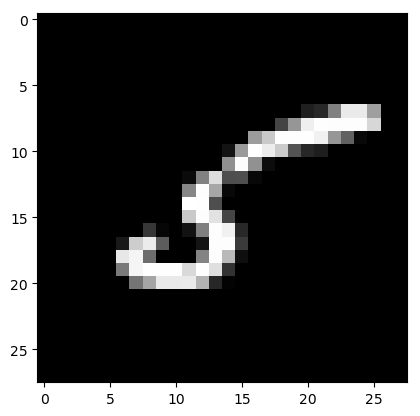

Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 1.6327 - accuracy: 0.4171 - val_loss: 1.3829 - val_accuracy: 0.4660
Epoch 2/3
625/625 [==============================] - 1s 2ms/step - loss: 1.3894 - accuracy: 0.4844 - val_loss: 1.2968 - val_accuracy: 0.4800
Epoch 3/3
625/625 [==============================] - 1s 2ms/step - loss: 1.3461 - accuracy: 0.4958 - val_loss: 1.2630 - val_accuracy: 0.5050


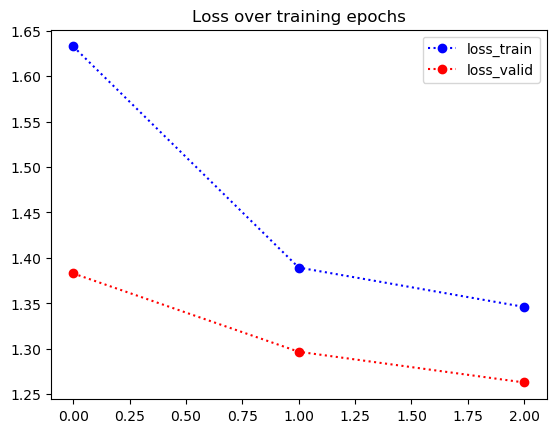

313/313 [==============================] - 0s 1ms/step - loss: 1.3412 - accuracy: 0.4949

TEST LOSS AND ACCURACY =  [1.3412052392959595, 0.4948999881744385]


In [15]:
if __name__ == '__main__':
    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # exemple pour visualiser la 11 ème image
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()

    nb_classes = 10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    # on réserve une base de valid
    FIN_APP = 20000
    DEBUT_VALID = 59000
    x_valid = x_train[DEBUT_VALID:,:,:]
    y_valid = y_train[DEBUT_VALID:]
    x_train = x_train[:FIN_APP,:,:]
    y_train = y_train[:FIN_APP]
    ###########################################################################
    # passage en encodage one-hot vector
    y_train = to_categorical(y_train, nb_classes)
    y_test = to_categorical(y_test, nb_classes)
    y_valid = to_categorical(y_valid, nb_classes)
    ###########################################################################
    # Déclaration et compilation du réseau recurrent
    le_reseau = rnn_classif_network(T, D)
    ###########################################################################
    # Apprentissage du réseau avec batch de 1
    # Base de validation testee à la fin de chaque époque
    # nb_epch = 3 pour le moment
    # la méthode renvoie l'historique de l'apprentissage
    Enregistrement = le_reseau.fit(x_train, y_train,batch_size=None, validation_data=(x_valid,y_valid), epochs=3)

    ###########################################################################
    # On visualise l'historique de l'apprentissage
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']
    metric_train = Enregistrement.history['accuracy']
    metric_valid = Enregistrement.history['val_accuracy']
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid")
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()

    ############################################################################
    #on teste les performances du réseau entrainé
    loss_test = le_reseau.evaluate(x_test, y_test)
    print("\nTEST LOSS AND ACCURACY = ", loss_test)


### 2. En vous inspirant du réseau de la première question,  completez la fonction rnn_classif_network et completez le code suivant :

In [16]:
def rnn_classif_network(T, D, couche, type_):   
    inputs = Input(name='input', shape=[T, D])
    layer = type_(couche, return_sequences=False)(inputs)
    predictions = Dense(10, activation='softmax')(layer)
    network = Model(inputs=inputs, outputs=predictions)
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

(60000, 28, 28)


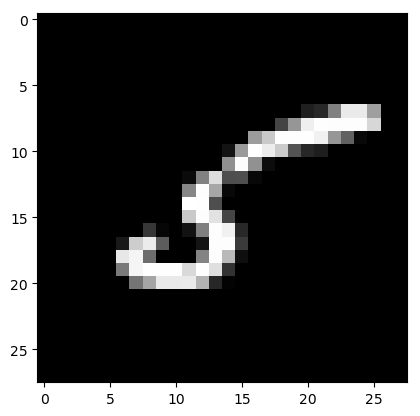

Epoch 1/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.9635 - accuracy: 0.6722 - val_loss: 0.5192 - val_accuracy: 0.8220
Epoch 2/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5255 - accuracy: 0.8224 - val_loss: 0.4456 - val_accuracy: 0.8550
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4482 - accuracy: 0.8486 - val_loss: 0.4287 - val_accuracy: 0.8560
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4019 - accuracy: 0.8669 - val_loss: 0.3992 - val_accuracy: 0.8760
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3799 - accuracy: 0.8724 - val_loss: 0.3937 - val_accuracy: 0.8690
Epoch 6/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.3598 - accuracy: 0.8803 - val_loss: 0.3623 - val_accuracy: 0.8920
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3432 - accuracy: 0.8861 - val_loss: 0.3323 - val_accuracy:

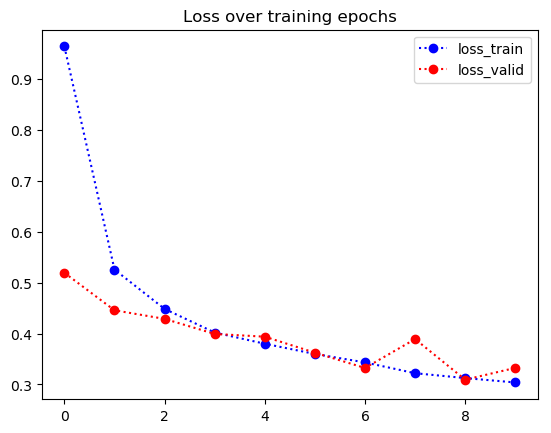

313/313 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8853

TEST LOSS AND ACCURACY =  [0.3442288935184479, 0.8852999806404114]


In [17]:
if __name__ == '__main__':
    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # exemple pour visualiser la 11 ème image
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()

    nb_classes = 10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    # on réserve une base de valid
    FIN_APP = 20000
    DEBUT_VALID = 59000
    x_valid = x_train[DEBUT_VALID:,:,:]
    y_valid = y_train[DEBUT_VALID:]
    x_train = x_train[:FIN_APP,:,:]
    y_train = y_train[:FIN_APP]
    ###########################################################################
    # passage en encodage one-hot vector
    y_train = to_categorical(y_train, nb_classes)
    y_test = to_categorical(y_test, nb_classes)
    y_valid = to_categorical(y_valid, nb_classes)
    ###########################################################################
    # Déclaration et compilation du réseau recurrent
    le_reseau = rnn_classif_network(T, D, 50, LSTM)
    ###########################################################################
    # Apprentissage du réseau avec batch de 1
    # Base de validation testee à la fin de chaque époque
    # nb_epch = 3 pour le moment
    # la méthode renvoie l'historique de l'apprentissage
    Enregistrement = le_reseau.fit(x_train, y_train,batch_size=10, validation_data=(x_valid,y_valid), epochs=10)

    ###########################################################################
    # On visualise l'historique de l'apprentissage
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']
    metric_train = Enregistrement.history['accuracy']
    metric_valid = Enregistrement.history['val_accuracy']
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid")
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()

    ############################################################################
    #on teste les performances du réseau entrainé
    loss_test = le_reseau.evaluate(x_test, y_test)
    print("\nTEST LOSS AND ACCURACY = ", loss_test)

# Meilleur modèle

In [18]:
net = rnn_classif_network(T, D, 50, LSTM)
cp = ModelCheckpoint("best.h5", verbose=1, save_best_only=True)
callback_list = [cp]
history = net.fit(x_train, y_train, epochs=10, validation_data=[x_valid, y_valid],
                  callbacks=callback_list, verbose=0)
print(history.history["loss"])
loss_train = net.evaluate(x_train, y_train)
print("\nTRAIN LOSS AND ACCURACY = ", loss_train)
net.load_weights("best.h5")
loss_test = net.evaluate(x_test, y_test)


Epoch 1: val_loss improved from inf to 0.64950, saving model to best.h5

Epoch 2: val_loss improved from 0.64950 to 0.46943, saving model to best.h5

Epoch 3: val_loss improved from 0.46943 to 0.46871, saving model to best.h5

Epoch 4: val_loss improved from 0.46871 to 0.38313, saving model to best.h5

Epoch 5: val_loss did not improve from 0.38313

Epoch 6: val_loss improved from 0.38313 to 0.36505, saving model to best.h5

Epoch 7: val_loss improved from 0.36505 to 0.35429, saving model to best.h5

Epoch 8: val_loss did not improve from 0.35429

Epoch 9: val_loss improved from 0.35429 to 0.34436, saving model to best.h5

Epoch 10: val_loss improved from 0.34436 to 0.32451, saving model to best.h5
[1.1156977415084839, 0.6213924288749695, 0.5141526460647583, 0.4631599187850952, 0.4257655739784241, 0.3951878249645233, 0.3664121925830841, 0.35128331184387207, 0.3330976665019989, 0.32114678621292114]
625/625 [==============================] - 2s 3ms/step - loss: 0.2937 - accuracy: 0.9010

In [19]:
print(len(x_train))

20000


In [20]:
print(len(x_valid))

1000
